# Predicting China's GDP
This project analyzes China's GDP data from 1960 to 2014 (55 years) and builds a predictive model using a logistic (sigmoid) function to capture the characteristic S-shaped growth pattern of economic development.

## 1. Importing Essential Libraries

In [1]:
import numpy as np  # For numerical operations and array manipulations
import pandas as pd  # For data manipulation and analysis (DataFrames)
import matplotlib.pyplot as plt  # For data visualization
from scipy.optimize import curve_fit  # For curve fitting
from sklearn.metrics import r2_score  # For model evaluation

C:\Users\User\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


## 2. Loading and Exploring the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('china_gdp.csv')

# Display first few rows
print("Dataset Preview:")
print(df.head())
print(f"\nDataset Shape: {df.shape}")
print(f"Data Range: {df['Year'].min()} to {df['Year'].max()}")

Dataset Preview:
   Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10

Dataset Shape: (55, 2)
Data Range: 1960 to 2014


In [3]:
# Separate features and target
x = df['Year'].values
y = df['Value'].values

## 3. Exploratory Data Analysis

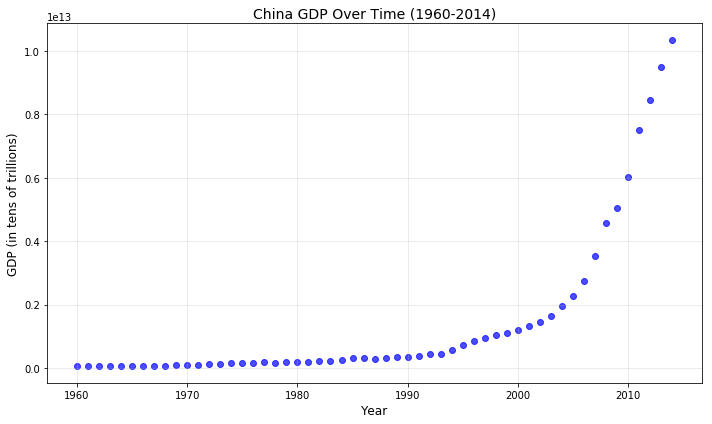

In [4]:
# Create a visualization of the raw data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='blue')
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in tens of trillions)', fontsize=12)
plt.title('China GDP Over Time (1960-2014)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Defining the Sigmoid Function

In [5]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1 * (x - Beta_2)))
    return y

## 5. Initial Model with Guess Parameters

In [6]:
# Initial parameter guesses
beta_1 = 0.10  # Initial growth rate guess
beta_2 = 1990.0  # Initial inflection point guess

# Generate initial predictions
Y_pred_initial = sigmoid(x, beta_1, beta_2)

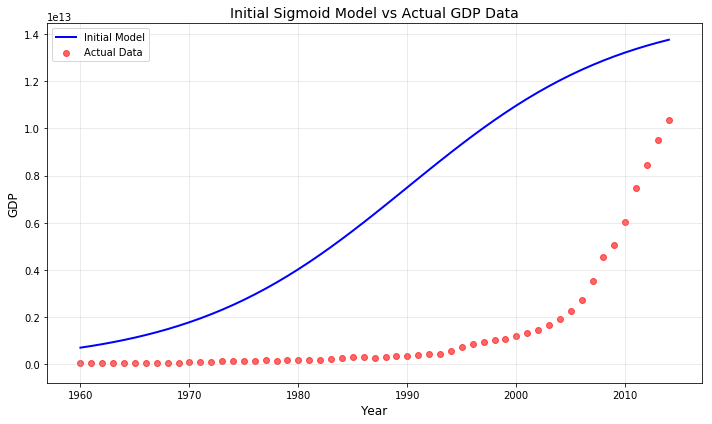

In [7]:
# Visualize initial fit
plt.figure(figsize=(10, 6))
plt.plot(x, Y_pred_initial * 1.5e13, 'b-', linewidth=2, label='Initial Model')
plt.scatter(x, y, color='red', alpha=0.6, label='Actual Data')
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP', fontsize=12)
plt.title('Initial Sigmoid Model vs Actual GDP Data', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Data Normalization for Better Fitting

In [8]:
x_norm =x/max(x)
y_norm =y/max(y)

## 7. Curve Fitting with Optimized Parameters

In [9]:
# Use curve_fit to find optimal parameters
popt, pcov = curve_fit(sigmoid, x_norm, y_norm, maxfev=10000)

# Extract optimized parameters
beta_1_opt, beta_2_opt = popt
print(f"\nOptimized Parameters:")
print(f"  Beta_1 (Growth Rate): {beta_1_opt:.6f}")
print(f"  Beta_2 (Inflection Point): {beta_2_opt:.6f}")

# Calculate parameter standard deviations
perr = np.sqrt(np.diag(pcov))
print(f"\nParameter Standard Errors:")
print(f"  Beta_1 Error: {perr[0]:.6f}")
print(f"  Beta_2 Error: {perr[1]:.6f}")


Optimized Parameters:
  Beta_1 (Growth Rate): 690.451712
  Beta_2 (Inflection Point): 0.997207

Parameter Standard Errors:
  Beta_1 Error: 39.021980
  Beta_2 Error: 0.000085


## 8. Model Evaluation and Visualization


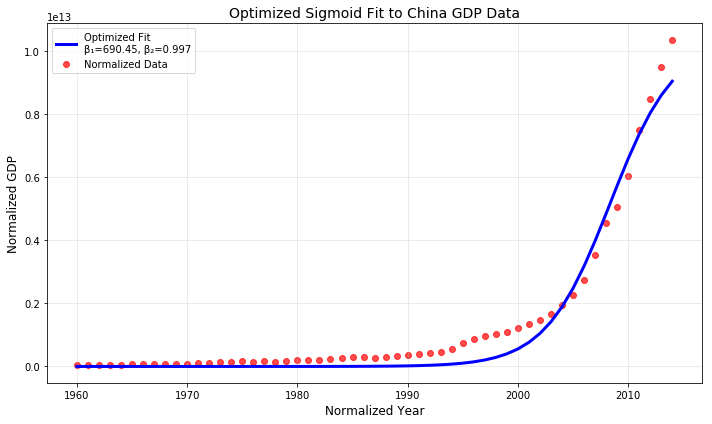

In [10]:
# Generate predictions with optimized parameters
y_pred_opt = sigmoid(x_norm, *popt)

# Create visualization of optimized fit
plt.figure(figsize=(10, 6))
plt.scatter(x_norm * max(x), y_norm * max(y), color='red', alpha=0.7, label='Normalized Data')
plt.plot(x_norm * max(x), y_pred_opt * max(y), 'b-', linewidth=3, label=f'Optimized Fit\nβ₁={beta_1_opt:.2f}, β₂={beta_2_opt:.3f}')
plt.xlabel('Normalized Year', fontsize=12)
plt.ylabel('Normalized GDP', fontsize=12)
plt.title('Optimized Sigmoid Fit to China GDP Data', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Model Performance Metrics

In [11]:
# Calculate R² score
r2 = r2_score(y_norm, y_pred_opt)

# Calculate Mean Squared Error
mse = np.mean((y_norm - y_pred_opt) ** 2)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error
mae = np.mean(np.abs(y_norm - y_pred_opt))


print("MODEL PERFORMANCE METRICS:")
print(f"R² Score: {r2:.6f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")

MODEL PERFORMANCE METRICS:
R² Score: 0.972805
Mean Squared Error (MSE): 0.001556
Root Mean Squared Error (RMSE): 0.039452
Mean Absolute Error (MAE): 0.030495


# Results Interpretation:

R² Score of 0.9728: The model explains approximately 97.27% of the variance in GDPs.

Good model performance: R² > 0.9 indicates an excellent predictive model



## Example:
China's GDP 50-year projection


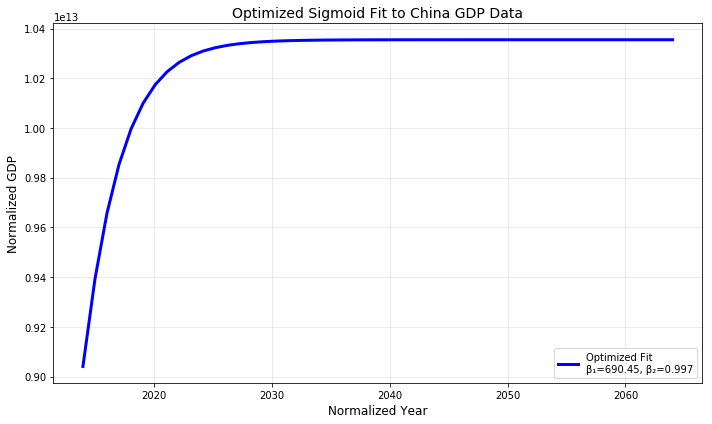

In [12]:
x_exmp = np.linspace(2014, 2064, 50)
x_exmp_norm = x_exmp/max(x)

# Generate predictions with optimized parameters
y_exmp_norm = sigmoid(x_exmp_norm, *popt)

# Create visualization of optimized fit
plt.figure(figsize=(10, 6))
plt.plot(x_exmp_norm * max(x), y_exmp_norm * max(y), 'b-', linewidth=3, label=f'Optimized Fit\nβ₁={beta_1_opt:.2f}, β₂={beta_2_opt:.3f}')
plt.xlabel('Normalized Year', fontsize=12)
plt.ylabel('Normalized GDP', fontsize=12)
plt.title('Optimized Sigmoid Fit to China GDP Data', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()